# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
import polars as pl
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from prophet import Prophet
import datetime as dt


warnings.filterwarnings("ignore")


# **Data for model training**

In [2]:
data = pd.read_csv(r"/Users/mak/Desktop/Code_With_Me/Sentiment project/Dataset.csv")
data.head()

,Date,content,negative,positive,neutral,anger,disgust,fear,joy,sadness,surprise,others,Close
0,2008-08-08,Georgia 'downs two Russian warplanes' as count...,0.958023,0.002330,0.039647,0.005730,0.747005,0.007258,0.002787,0.018063,0.002183,0.216975,1296.319946
1,2008-08-11,Why wont America and Nato help us? If they won...,0.520679,0.012596,0.466726,0.973947,0.009760,0.001813,0.003058,0.001230,0.002144,0.008047,1305.319946
2,2008-08-12,Remember that adorable 9-year-old who sang at ...,0.652820,0.007342,0.339837,0.009456,0.780139,0.002923,0.002713,0.002190,0.002594,0.199984,1289.589966
3,2008-08-13,U.S. refuses Israel weapons to attack Iran: r...,0.562527,0.007450,0.430024,0.007003,0.489413,0.004274,0.004038,0.003949,0.002458,0.488864,1285.829956
4,2008-08-14,All the experts admit that we should legalise ...,0.532804,0.009038,0.458158,0.002622,0.069588,0.002951,0.004706,0.001285,0.004277,0.914570,1292.930054


In [3]:
data.columns

Index(['Date', 'content', 'negative', 'positive', 'neutral', 'anger',
       'disgust', 'fear', 'joy', 'sadness', 'surprise', 'others', 'Close'],
      dtype='object')

In [4]:
data_model = data[['Date', 'negative', 'positive', 'neutral', 'anger',
       'disgust', 'fear', 'joy', 'sadness', 'surprise', 'others', 'Close']]

In [5]:
data_model.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

In [6]:
data_model.head()

,ds,negative,positive,neutral,anger,disgust,fear,joy,sadness,surprise,others,y
0,2008-08-08,0.958023,0.002330,0.039647,0.005730,0.747005,0.007258,0.002787,0.018063,0.002183,0.216975,1296.319946
1,2008-08-11,0.520679,0.012596,0.466726,0.973947,0.009760,0.001813,0.003058,0.001230,0.002144,0.008047,1305.319946
2,2008-08-12,0.652820,0.007342,0.339837,0.009456,0.780139,0.002923,0.002713,0.002190,0.002594,0.199984,1289.589966
3,2008-08-13,0.562527,0.007450,0.430024,0.007003,0.489413,0.004274,0.004038,0.003949,0.002458,0.488864,1285.829956
4,2008-08-14,0.532804,0.009038,0.458158,0.002622,0.069588,0.002951,0.004706,0.001285,0.004277,0.914570,1292.930054


# **Model**

## **Model Training**

In [7]:
p = Prophet()
p.add_regressor('negative')
p.add_regressor('positive')
p.add_regressor('neutral')
p.add_regressor('anger')
p.add_regressor('disgust')
p.add_regressor('fear')
p.add_regressor('joy')
p.add_regressor('sadness')
p.add_regressor('surprise')
p.add_regressor('others')
p.add_country_holidays(country_name='US')


In [8]:
p.fit(data_model)

19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:23:26 - cmdstanpy - INFO - Chain [1] done processing


## **Model Testing**

In [9]:
data_model.ds.max()

'2024-06-28'

In [10]:
data_model.ds.min()

'2008-08-08'

In [11]:
data_test = pd.read_csv(r'/Users/mak/Desktop/Code_With_Me/Sentiment project/test_data.csv')

In [12]:
data_test.rename(columns={'Date':'ds'}, inplace=True)

In [13]:
data_test

,ds,content,negative,positive,neutral,anger,disgust,fear,joy,sadness,surprise,others
0,2024-06-29,Jordan Bardella and Marine Le Pen's National R...,0.360812,0.013501,0.625687,0.002155,0.095374,0.005765,0.006104,0.001817,0.002811,0.885972
1,2024-06-30,The BBC's economics editor speaks to Swindon r...,0.120556,0.018910,0.860533,0.001401,0.016790,0.002354,0.005669,0.001089,0.002314,0.970383
2,2024-07-01,National Rally is in pole position for a histo...,0.054576,0.067036,0.878387,0.001220,0.012127,0.017883,0.006701,0.002565,0.001689,0.957815
3,2024-07-02,The US president condemns a Supreme Court verd...,0.200949,0.020413,0.778637,0.000975,0.006931,0.003527,0.008009,0.005471,0.001553,0.973533
4,2024-07-03,Speculation is swirling around whether the pre...,0.654576,0.012487,0.332937,0.001073,0.002835,0.060805,0.020340,0.005045,0.006202,0.903699
5,2024-07-04,Polls will open at 07:00 on Thursday as millio...,0.001794,0.633656,0.364550,0.002172,0.002265,0.255092,0.043333,0.004639,0.010858,0.681641
6,2024-07-05,The general election exit poll and the expecte...,0.001683,0.667487,0.330830,0.000789,0.002128,0.004964,0.016498,0.001095,0.003781,0.970745
7,2024-07-06,The new PM and his team face the huge responsi...,0.009878,0.181456,0.808665,0.000914,0.002060,0.006219,0.016996,0.002095,0.001827,0.969889
8,2024-07-07,The US actor and comedian's two-year-old Henry...,0.662891,0.012574,0.324535,0.000834,0.004352,0.008994,0.008826,0.002109,0.002364,0.972521
9,2024-07-08,Marianna Spring shares what she discovered dur...,0.641210,0.009790,0.349000,0.001851,0.004687,0.229126,0.016936,0.009457,0.003660,0.734283


In [14]:
prediction = p.predict(data_test)

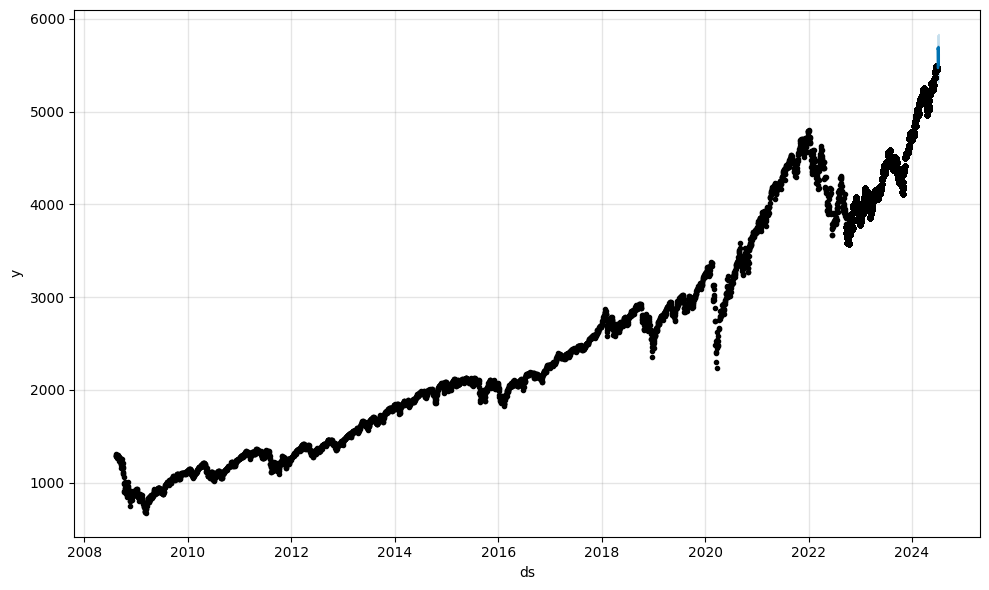

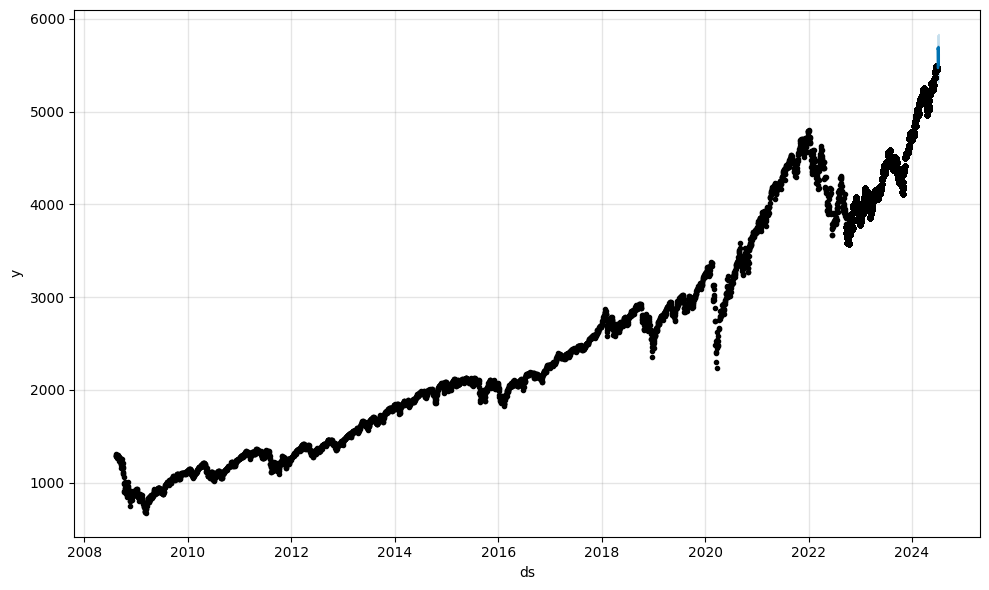

In [15]:
p.plot(prediction)

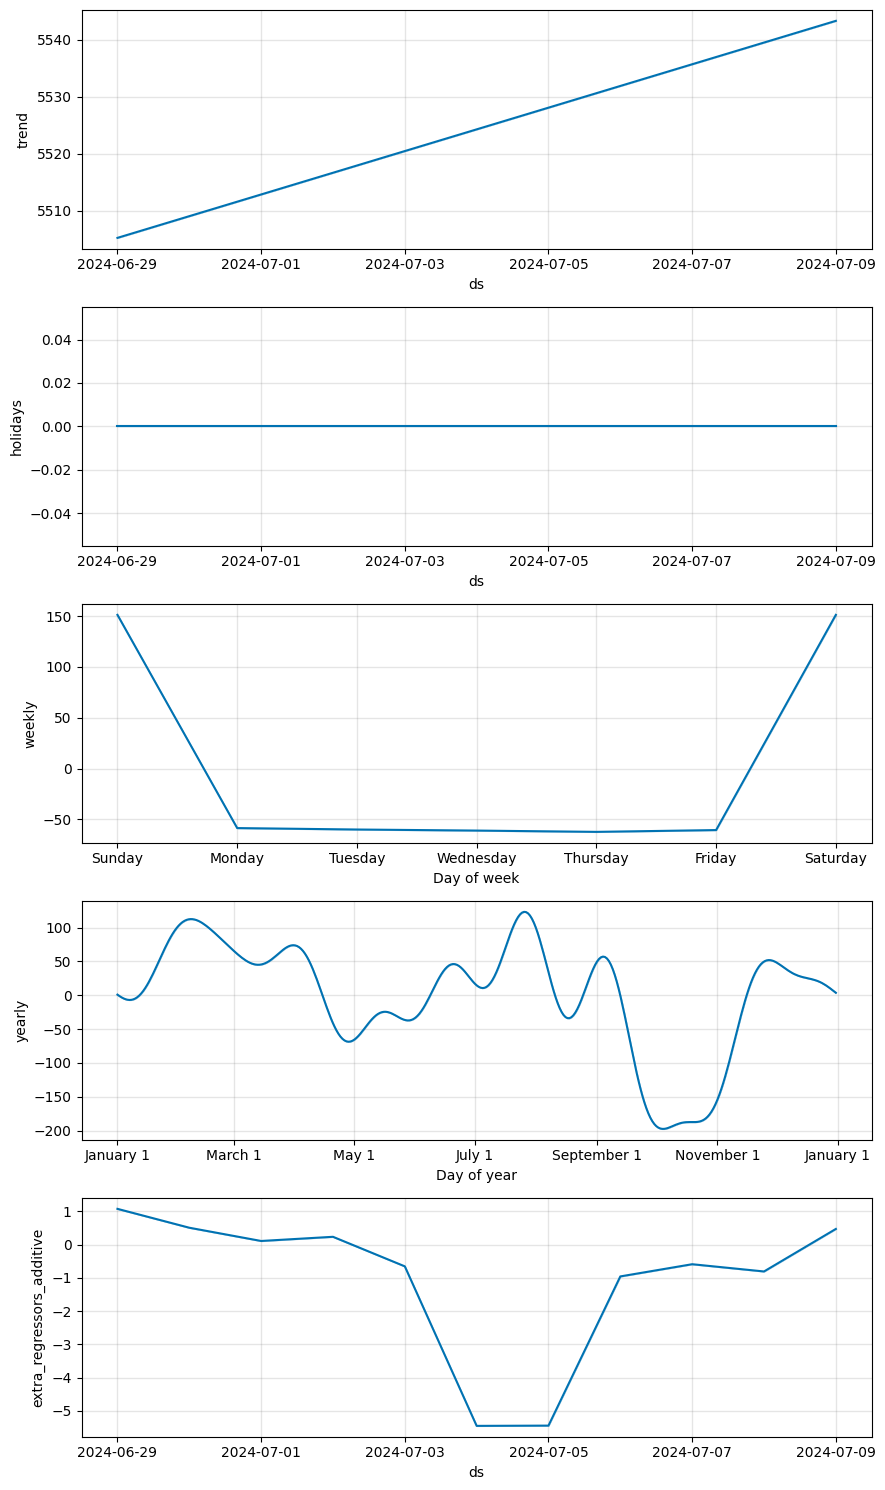

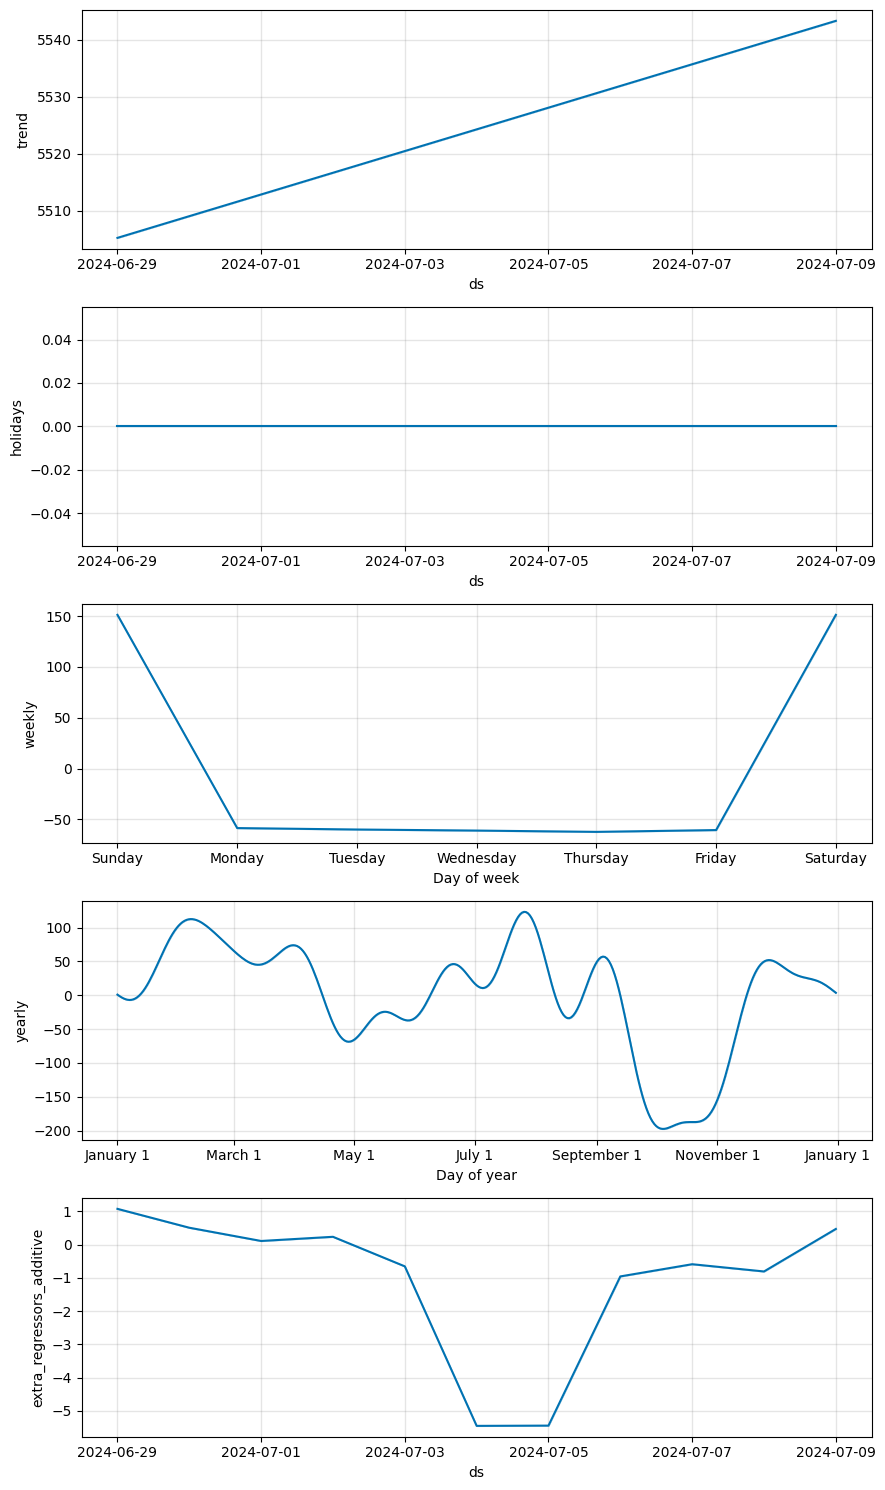

In [16]:
p.plot_components(prediction)

In [17]:
prediction = prediction[['ds', 'yhat']]

In [ ]:
prediction.rename(columns={'yhat':'y'}, inplace=True)

In [ ]:
sp500 =yf.download("^GSPC", start="2008-08-08", end="2024-07-09")

In [ ]:
sp500.reset_index(inplace=True)

In [ ]:
sp500

In [ ]:
sp500 = sp500[['Date', 'Close']]

In [ ]:
plt.figure(figsize=(50, 10))
plt.plot(sp500['Date'], sp500['Close'], color='green')
plt.plot(prediction['ds'], prediction['y'], color='red')
plt.legend(['S&P 500(Actual)', 's&p 500 (Prediction)'])

plt.show()

In [ ]:

import altair as alt

chart1 = alt.Chart(sp500).mark_circle(color='blue').encode(
x=alt.X('Date', axis=alt.Axis(title='Date'), type='temporal'),
y=alt.Y('Close', axis=alt.Axis(title='Closing Price')),
).interactive()


chart2 = alt.Chart(prediction).mark_circle(color='red').encode(
x=alt.X('ds', axis=alt.Axis(title='Date'), type='temporal'),
y=alt.Y('y', axis=alt.Axis(title='PredictedClosing Price')),
).interactive()


combined_chart = alt.layer(chart1, chart2, title='S&P 500 vs. Predicted S&P 500', height=200, width=1000).interactive()

combined_chart

### **Let's zoom on the predicted week**

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(sp500['Date'], sp500['Close'], color='green')
plt.plot(prediction['ds'], prediction['y'], color='red')
plt.xlim(dt.date(2024, 6, 29), dt.date(2024, 7, 9))
plt.legend(['S&P 500(Actual)', 's&p 500 (Prediction)'])
plt.show()

## **Without sentiments**

In [ ]:
p2 = Prophet()
p2.add_country_holidays(country_name='US')

In [ ]:
data_model2 = data_model.copy()
data_model2 = data_model2[['ds','y']]

In [ ]:
p2.fit(data_model2)

In [ ]:
data_test2 = data_test.copy()
data_test2 = data_test2[['ds']]

In [ ]:
prediction2 = p2.predict(data_test2)

In [ ]:
prediction2

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(sp500['Date'], sp500['Close'], color='green')
plt.plot(prediction2['ds'], prediction2['yhat'], color='red')
plt.xlim(dt.date(2024, 6, 29), dt.date(2024, 7, 9))
plt.legend(['S&P 500(Actual)', 's&p 500 (Prediction)'])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_model2['y'], order=(1, 0, 1))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=11)

In [ ]:
prediction3  = pd.DataFrame(forecast.predicted_mean)

In [ ]:
prediction3

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(sp500['Date'], sp500['Close'], color='green')
plt.plot(prediction2['ds'], prediction3['predicted_mean'], color='red')
plt.xlim(dt.date(2024, 6, 29), dt.date(2024, 7, 9))
plt.legend(['S&P 500(Actual)', 's&p 500 (Prediction)'])
plt.show()